## Part 1 : Meet the Data

**Data description** – This data includes four columns/random variables: the daily ETF return; the daily relative change in the price of the crude oil; the daily relative change in the gold price; and the daily return of the JPMorgan Chase & Co stock. The sample size is 1000. 

**Requirements** – Use any software to obtain the sample mean and sample standard deviation for each random variable (column) of the data; the sample correlations among each pair of the four random variables (columns) of the data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# Sample of the data

df = pd.read_excel('data.xlsx')
df.head()

,Close_ETF,oil,gold,JPM
0,97.349998,0.039242,0.004668,0.032258
1,97.750000,0.001953,-0.001366,-0.002948
2,99.160004,-0.031514,-0.007937,0.025724
3,99.650002,0.034552,0.014621,0.011819
4,99.260002,0.013619,-0.011419,0.000855


In [3]:
# Exploration of the type of data. ALl numerical, no need to change

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Close_ETF  1000 non-null   float64
 1   oil        1000 non-null   float64
 2   gold       1000 non-null   float64
 3   JPM        1000 non-null   float64
dtypes: float64(4)
memory usage: 31.4 KB


**Sample standard deviation and standard mean**

In [4]:
df.describe()

,Close_ETF,oil,gold,JPM
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,121.152960,0.001030,0.000663,0.000530
std,12.569790,0.021093,0.011289,0.011017
min,96.419998,-0.116533,-0.065805,-0.048217
25%,112.580002,-0.012461,-0.004816,-0.005538
50%,120.150002,0.001243,0.001030,0.000386
75%,128.687497,0.014278,0.007482,0.006966
max,152.619995,0.087726,0.042199,0.057480


**Correlation between the random variables**

In [5]:
df.corr()

,Close_ETF,oil,gold,JPM
Close_ETF,1.000000,-0.009045,0.022996,0.036807
oil,-0.009045,1.000000,0.235650,-0.120849
gold,0.022996,0.235650,1.000000,0.100170
JPM,0.036807,-0.120849,0.100170,1.000000


- Above we can check the correlation between differeent random variables, and can see that there is no significant linear correlation (definition of the Pearson Correlation Coefficient). This can also be visualized using a heat map, seen below.

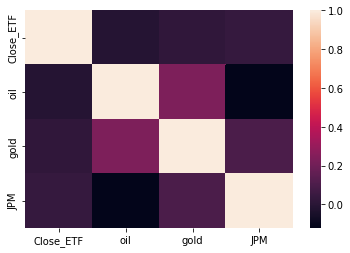

In [6]:
_ = sns.heatmap(df.corr())

## Part 2: Describe your data

**Requirements** – Use any software to draw the following plots:

1. A histogram for each column (hint: four histograms total)
2. time series plot for each column (hint: use the series “1, 2, 3, ..., 1000” as the horizontal axis; four plots total) 
3. A time series plot for all four columns (hint: one plot including four “curves” and each “curve” describes one column) 
4. Three scatter plots to describe the relationships between the ETF column and the OIL column; between the ETF column and the GOLD column; between the ETF column and the JPM column, respectively

In [7]:
import matplotlib.pyplot as plt

In [8]:
# Creating the Horizontal Axis for the plots

y = list(range(1,1001))

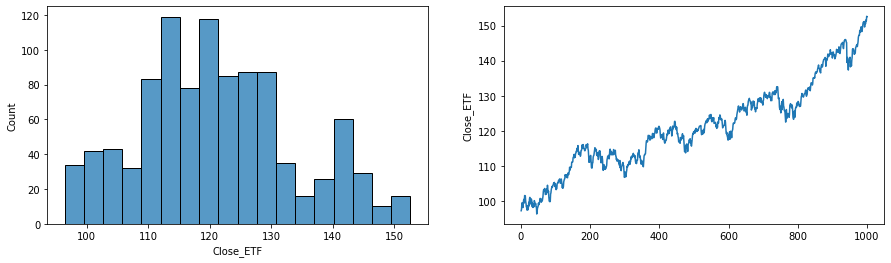

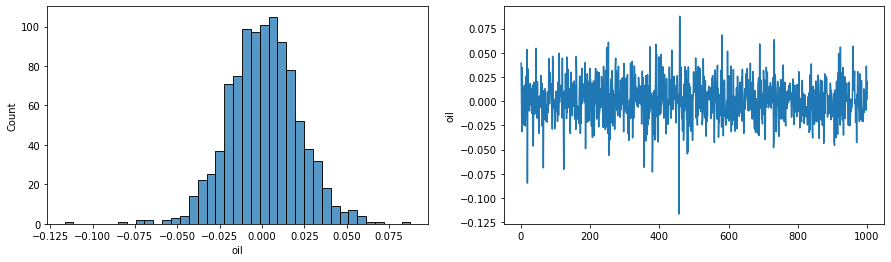

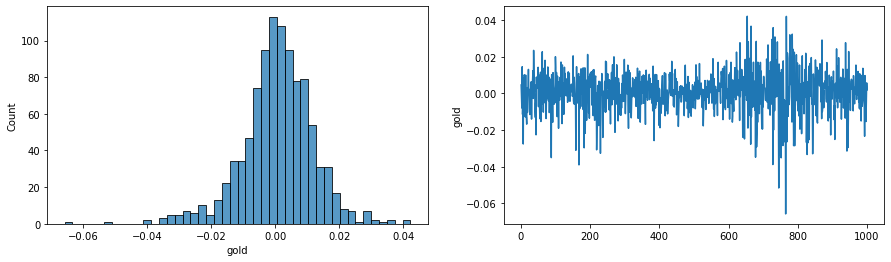

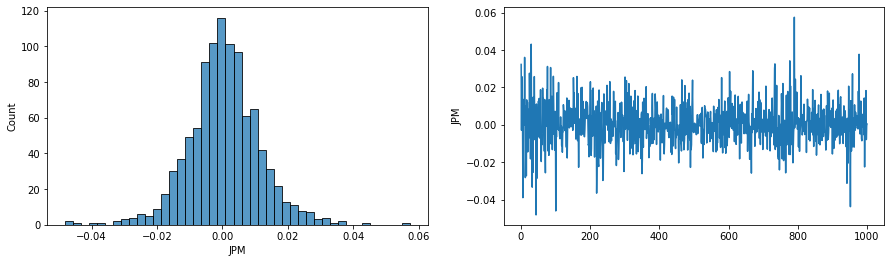

In [9]:
# Histogram and Time Series Plot

numerical = df.select_dtypes('number').columns
for col in numerical:
    fig, ax = plt.subplots(1, 2, figsize=(15,4))
    sns.histplot(data=df, x=col, ax=ax[0])
    sns.lineplot(data=df, x=y, y=col, ax=ax[1]);

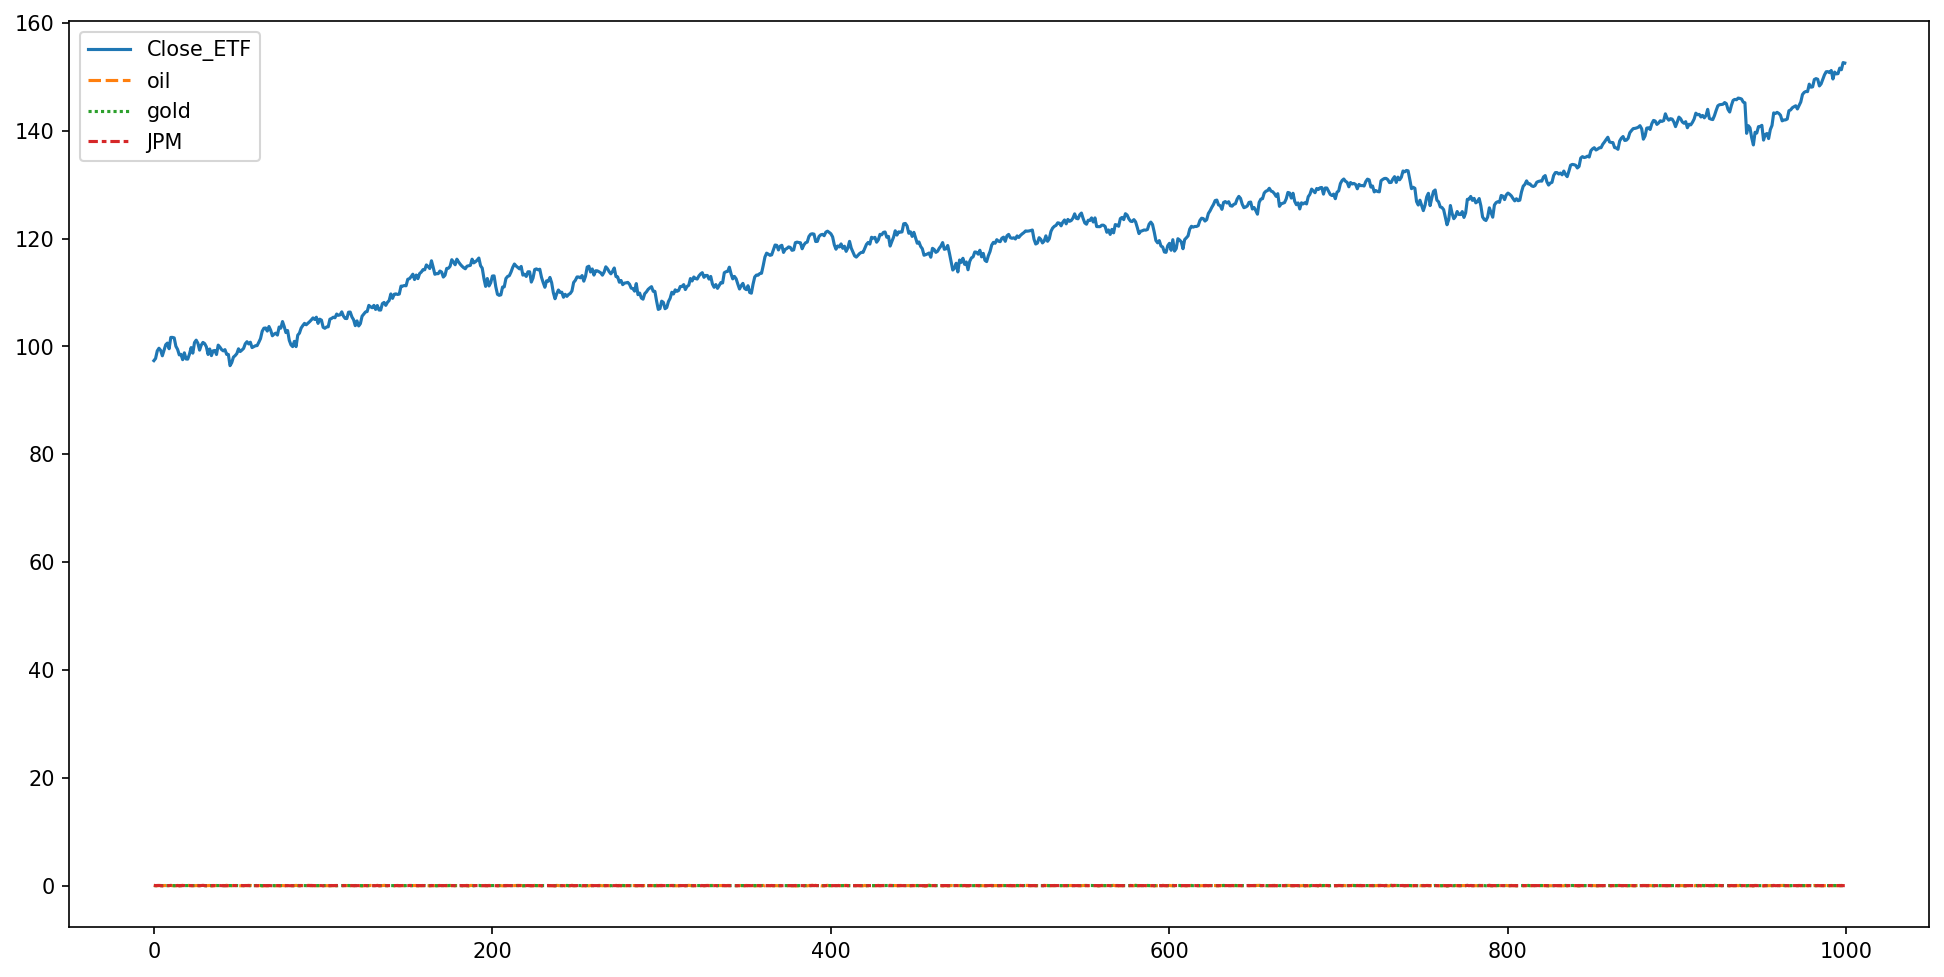

In [10]:
# Time series plot for all four columns:

plt.figure(figsize=(16, 8), dpi=150)
_ = sns.lineplot(data = df)

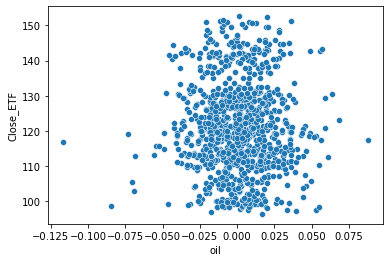

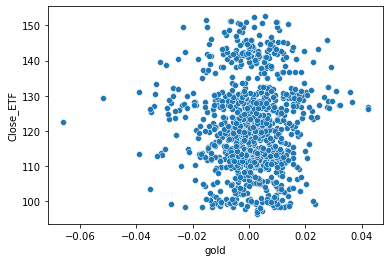

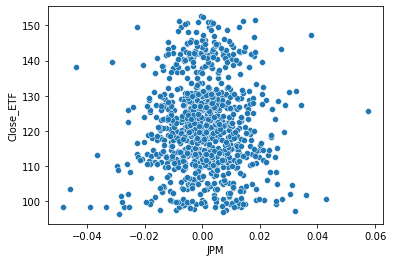

In [11]:
# relationships between the ETF column and other Variables

numerical2 = ['oil', 'gold', 'JPM']
for col in numerical2:
    fig, ax = plt.subplots(1, 1, figsize=(6,4))
    sns.scatterplot(data=df, x=col, y=df.Close_ETF)

## Part 3: What distribution does your data follow

**Requirements** – Propose an assumption/a hypothesis regarding the type of distribution each column of the data set may follow (i.e., the ETF, OIL, GOLD, and JPM column), based on the plots from Part 2. Then verify or object that assumption/hypothesis with appropriate tests (for example, normality test). You may use any software to perform those tests.

**Assumption** 
- I will assume that each of these variables are distributed normally, as we can see in the graphs in Part 2. Although certain variables seem to be better alligned with a Gaussian distribution, we will determine this by using a normality test. In this case we will use a **Shapiro-Wilk Test**. 

**Hypothesis**

- If the p-value is less than 0.05 (standard significance level), then we reject the null hypothesis and assume that the distribution of our variable is not normal. If the p-value is higher than 0.05 then we assume the distribution of the variables is normal. 

**Null Hypothesis** - The data does not follow a normal distribution

In [12]:
# Import Shapiro-Wilk test form statisitical package

from scipy.stats import shapiro

In [13]:
cols = ['Close_ETF', 'oil', 'gold', 'JPM']

In [14]:
for col in cols:
    stat, p = shapiro(df[col])
    print(col, 'stat = %.3f, p = %.3f\n' % (stat,p))
    if p > 0.05:
        print('Fail to reject the null hypothesis, assume our distribution is not normal')
        print('-------------------------------------------------------------------------')
    else:
        print('Reject the null hypothesis, assume our distribution is normal')
        print('-------------------------------------------------------------------------')

Close_ETF stat = 0.980, p = 0.000

Reject the null hypothesis, assume our distribution is normal
-------------------------------------------------------------------------
oil stat = 0.989, p = 0.000

Reject the null hypothesis, assume our distribution is normal
-------------------------------------------------------------------------
gold stat = 0.969, p = 0.000

Reject the null hypothesis, assume our distribution is normal
-------------------------------------------------------------------------
JPM stat = 0.980, p = 0.000

Reject the null hypothesis, assume our distribution is normal
-------------------------------------------------------------------------


- Therefore we can assume that all four independant variables follow a normal distribution

## Part 4: Break your data into small groups and let them discuss the importance of the Central Limit Theorem
**Requirements** – Consider the ETF column (1000 values) as the population (x), and do the follows. Any software may be used.

In [15]:
import pprint

In [16]:
etf = df.Close_ETF

#### 1. Calculate the mean 〖μ〗_x and the standard deviation σ_x of the population.

In [17]:
etf_mn = etf.mean()
print(etf_mn)

121.1529600120001


In [18]:
etf_std = etf.std()
print(etf_std)

12.569790313110744


#### 2. Break the population into 50 groups sequentially and each group includes 20 values.

In [19]:
x = np.array_split(etf,20)

#### 3. Calculate the sample mean (¯x) of each group. Draw a histogram of all the sample means. Comment on the distribution of these sample means, i.e., use the histogram to assess the normality of the data consisting of these sample means.

In [20]:
import statistics as stat

In [21]:
# Calculating sample mean

s_means = [sum(elem)/len(elem) for elem in zip(*x)]  

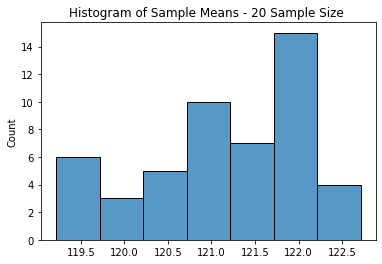

In [105]:
# Histogram of sample means

_ = sns.histplot(data=s_means).set(title='Histogram of Sample Means - 20 Sample Size ')

- Here we can see that the sample mean is not normally distributed

#### 4. Calculate the mean (〖μ〗_¯x ) and the standard deviation (σ_¯x) of the data including these sample means. Make a comparison between μ_x and μ_¯x , between ( σ_x)/√n and σ_¯x . Here, n is the number of sample means calculated from Item 3) above.

In [23]:
# the mean and standard deviation of the etf was found above. Here, we calculate 

etf_mn_2 = stat.mean(s_means)
print(etf_mn_2)

121.152960012


- Here we can see that the mean and the sample means remains the same, as the data remains the same.

In [24]:
etf_std_2 = stat.stdev(s_means)

print(etf_std_2)
print(etf_std / np.sqrt(50))

0.9513044459069702
1.7776367936987165


- Here we can see that there is a difference between the sample standard deviation and the standard deviation of the data divided by the square root of the number of sample means.

#### 5. Are the results from Items 3) and 4) consistent with the Central Limit Theorem? Why?

The central limit theorem states that if you have a population with mean μ and standard deviation σ and take sufficiently large random samples from the population with replacement , then the distribution of the sample means will be approximately normally distributed. Because we did not take any random samples, our results were not normally distributed; therefore it is not consistent with the central limit theorem. 

#### 6. Break the population into 10 groups sequentially and each group includes 100 values. Repeat steps above. 

In [25]:
x1 = np.array_split(etf,100)

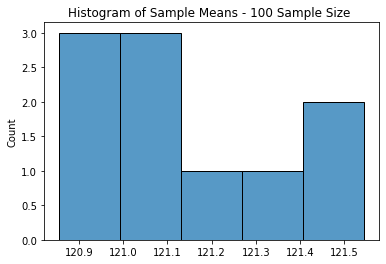

In [104]:
# Sample means and histogram of sample means

s_means1 = [sum(elem)/len(elem) for elem in zip(*x1)]  
_ = sns.histplot(data=s_means1).set(title='Histogram of Sample Means - 100 Sample Size ')

- Here we can see that the sample mean is not normally distributed

In [27]:
etf_mn_2 = stat.mean(s_means1)
print('Comparison of Means')
print(etf_mn)
print(etf_mn_2)

print('-----------------------')

etf_std_2 = stat.stdev(s_means1)
print('Comparison of Standard Deviation')
print(etf_std_2)
print(etf_std / np.sqrt(10))

Comparison of Means
121.1529600120001
121.15296001199998
-----------------------
Comparison of Standard Deviation
0.2493916967824131
3.9749167100151


- Here we can see that the means is still the same, however the standard deviation has decreased for both the population and the sample. 

_This result is still not consistent with the Central Limit Theorem for the same reasons mentioned above: we did not take any random samples therefore our results were not normally distributed_

#### 8. Generate 50 simple random samples or groups (with replacement) from the population. The size of each sample is 20, i.e., each group includes 20 values. Repeat steps above.

In [28]:
choices = np.random.choice(etf, size=1000, replace=True)

In [29]:
x2 = np.array_split(choices,20)

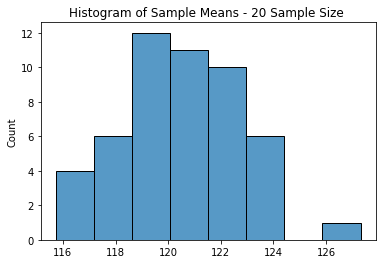

In [103]:
# Sample means and histogram of sample means

s_means2 = [sum(elem)/len(elem) for elem in zip(*x2)]  
_ = sns.histplot(data=s_means2).set(title='Histogram of Sample Means - 20 Sample Size ')

- Here we can see that although it is not signifiantly normally distributed, it is alot more evident here with random samples then in the examples above. 

In [31]:
etf_mn_2 = stat.mean(s_means2)
print('Comparison of Means')
print(etf_mn)
print(etf_mn_2)

print('-----------------------')

etf_std_2 = stat.stdev(s_means2)
print('Comparison of Standard Deviation')
print(etf_std_2)
print(etf_std / np.sqrt(50))

Comparison of Means
121.1529600120001
120.55296007199999
-----------------------
Comparison of Standard Deviation
2.36920455369242
1.7776367936987165


- Here we can see that the mean is slightly different (less than 1%), however this is expected as there is now replacements. The standard deviation follows the same trend as above, which is exected as we have a larger number of sample sizes (50 vs 10).  

_This result is now consistent with the Central Limit Theorem: we took random samples therefore our results are more normally distributed around the mean_

#### 10. Generate 10 simple random samples or groups (with replacement) from the population. The size of each sample is 100, i.e., each group includes 100 values.

In [32]:
choices2 = np.random.choice(etf, size=1000, replace=True)

In [33]:
x3 = np.array_split(choices2,100)

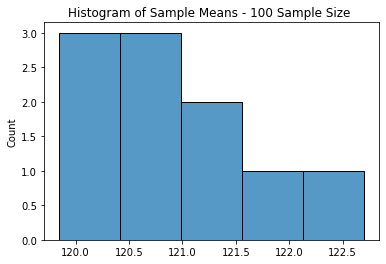

In [102]:
# Sample means and histogram of sample means

s_means3 = [sum(elem)/len(elem) for elem in zip(*x3)]  
_ = sns.histplot(data=s_means3).set(title='Histogram of Sample Means - 100 Sample Size ')

In [35]:
etf_mn_2 = stat.mean(s_means3)
print('Comparison of Means')
print(etf_mn)
print(etf_mn_2)

print('-----------------------')

etf_std_2 = stat.stdev(s_means3)
print('Comparison of Standard Deviation')
print(etf_std_2)
print(etf_std / np.sqrt(10))

Comparison of Means
121.1529600120001
120.93559020599997
-----------------------
Comparison of Standard Deviation
0.8868944880482097
3.9749167100151


- Here we can see that the mean is slightly different (less than 1%), however this is expected as there is now replacements. The standard deviation also differes more than the example above, which is exected as we have a smaller number of random samples (50 vs 10). 

_This result is also consistent with the Central Limit Theorem; however not as evident as the ecample above: we took random samples therefore our results are more normally distributed around the mean, however the normal distribution is alot more evident with higher random samples_

#### 12. In Part 3 of the project, you have figured out the distribution of the population (the entire ETF column). Does this information have any impact on the distribution of the sample mean(s)? Explain your answer.

The central limit theorem says that the sampling distribution of the mean will always be normally distributed, as long as the sample size is large enough. Regardless of whether the population has a normal, Poisson, binomial, or any other distribution, the sampling distribution of the mean will be normal. Therefore the distrbution of the population does not have an impact on the distribution of the sample mean(s). 

## Part 5: Construct a confidence interval with your data
**Requirements** – 

In [36]:
import scipy.stats as st

#### 1. Pick up one of the 10 simple random samples you generated in Step 10) of Part 4, construct an appropriate 95% confidence interval of the mean μ.

In [37]:
# Selecting the first simple random sample

data = [elem for elem in zip(*x3)][0]

In [38]:
# Finding the 95% confidence interval using the normal distribution

st.norm.interval(alpha=0.95, loc=np.mean(data), scale=st.sem(data))

(120.23011534341776, 125.16808463658222)

#### 2. Pick up one of the 50 simple random samples you generated in Step 8) of Part 4, construct an appropriate 95% confidence interval of the mean μ.

In [39]:
# Selecting the first simple random sample

data1 = [elem for elem in zip(*x2)][0]

In [40]:
# Finding the 95% confidence interval using the normal distribution

st.norm.interval(alpha=0.95, loc=np.mean(data), scale=st.sem(data1))

(116.9826391352873, 128.4155608447127)

#### 3. In Part 1, you have calculated the mean μ of the population (the entire ETF column) using Excel function. Do the two intervals from 1) and 2) above include (the true value of) the mean μ? Which one is more accurate? Why?

In [41]:
print('The mean of the population is: ', etf.mean())

The mean of the population is:  121.1529600120001


In both confidence intervals above, we can see that the intervals include the mean of the population (entire ETF column). Although both confidence intervals are nearly identical, the one that is more accurate is the one with 50 simple random samples generated. This is because their is a larger amount of random sample, meaning that it is not as bias as the 10 simple random samples. 

## Part 6: Form a hypothesis and test it with your data

**Requirements –**
 

In [42]:
from statsmodels.stats.weightstats import ztest
from scipy import stats

**1. Use the same sample you picked up in Step 1) of Part 5 to test H_0:  μ=100 vs. H_a:  μ≠100 at the significance level 0.05. What’s your conclusion?**

Using a two-sided z-test to determine whether the mean is equal 100. Our sample size is above 30, therefore all conditions of the z-test are met. 

In [130]:
ztest(data1, value=100, alternative='two-sided')

(5.677128968918836, 1.369742029016157e-08)

- Above we can see that the p-value is less than 0.05, therefore we can reject the null hypothesis and say that the mean is not 100.

**2. Use the same sample you picked up in Step 2) of Part 5 to test H_0:  μ=100 vs. H_a:  μ≠100 at the significance level 0.05. What’s your conclusion?**

Here we will use a t-test to determine if the mean is 100. Our sample size is less than 30, therefore the conditions of the z-test are not met. 

In [129]:
stats.ttest_1samp(data, popmean=100)

Ttest_1sampResult(statistic=18.019317586060875, pvalue=5.0614382285231476e-33)

- Above we can seme that the p-value is less than 0.05, therefore we can reject the null hypothesis and say that the mean is not 100.

**3. Use the same sample you picked up in Step 1) of Part 5 to test H_0:  σ=15   vs. H_a:  σ≠15 at the significance level 0.05. What’s your conclusion?**

In [128]:
stats.chisquare(data, 15)

Power_divergenceResult(statistic=78374.63997436938, pvalue=0.0)

**4. Use the same sample you picked up in Step 2) of Part 5 to test H_0:  σ=15   vs. H_a:  σ<15 at the significance level 0.05. What’s your conclusion?**

## Part 7: Compare your data with a different data set

**Requirements –**

In [45]:
gold = df.gold
oil = df.oil

**1. Consider the entire Gold column as a random sample from the first population, and the entire Oil column as a random sample from the second population. Assuming these two samples be drawn independently, form a hypothesis and test it to see if the Gold and Oil have equal means in the significance level 0.05.**

We will use a t-test because we know that we have two independant variables and we want to compare their mean. The t-test tests the null hypothesis that 2 independent samples have identical average (expected) values.

In [46]:
stats.ttest_ind(gold, oil)

Ttest_indResult(statistic=-0.48536661382360874, pvalue=0.6274695258306375)

- The p-value is not less than 0.05, therefore we cannot reject the null hypothesis that the 2 independant samples have equal means.

**2. Subtract the entire Gold column from the entire Oil column and generate a sample of differences. Consider this sample as a random sample from the target population of differences between Gold and Oil. Form a hypothesis and test it to see if the Gold and Oil have equal means in the significance level 0.05.**

In [47]:
# Generating a sample of differences

dif = oil - gold

Using a two-sided z-test to determine whether the mean is equal 0; which would prove that both gold and oil have equal means. Our sample size is above 30, therefore all conditions of the z-test are met. 

In [48]:
ztest(dif, value=0)

(0.5413309278514735, 0.5882795066915598)

- The p-value is not less than 0.05, therefore we cannot reject the null hypothesis that both oil and gold have a difference of 0

**3. Consider the entire Gold column as a random sample from the first population, and the entire Oil column as a random sample from the second population. Assuming these two samples be drawn independently, form a hypothesis and test it to see if the Gold and Oil have equal standard deviations in the significance level 0.05.**

Here we will use the f-test to see if the two samples have the same variance

## Part 8: Fitting the line to the data
**Requirements –
Consider the data including the ETT column and Gold column only. Using any software,**

**1. Draw a scatter plot of ETF (Y) vs. Gold (X). Is there any linear relationship between them which can be observed from the scatter plot?**

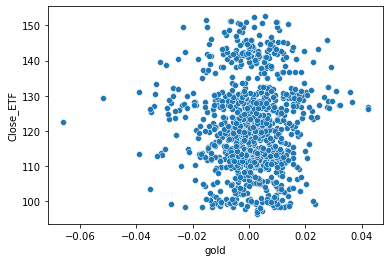

In [49]:
_ = sns.scatterplot(data=df, x='gold', y='Close_ETF')

- No linear relationship can be seen between them based on the scatterplot

**2. Calculate the coefficient of correlation between ETF and Gold and interpret it.**

In [50]:
df[['gold' ,'Close_ETF']].corr()

,gold,Close_ETF
gold,1.000000,0.022996
Close_ETF,0.022996,1.000000


- Above we can see that the coefficient of correlation between ETF and Gold is almost zero, meaning that these two independant variables do not have a linear relationship, as seen in the graph above.

**3. Fit a regression line (or least squares line, best fitting line) to the scatter plot. What are the intercept and slope of this line? How to interpret them?**

Text(0.5, 1.0, 'Gold vs ETF - Regression Line Fit')

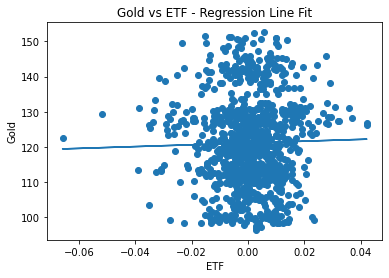

In [97]:
#find line of best fit
a, b = np.polyfit(gold, etf, 1)

#add points to plot
plt.scatter(gold, etf)

#add line of best fit to plot
_ = plt.plot(gold, a*gold+b)  
plt.xlabel('ETF')
plt.ylabel('Gold')
plt.title('Gold vs ETF - Regression Line Fit')

In [52]:
print('The slope of the line is - ', a)
print('The intercept of the line is - ', b)

The slope of the line is -  25.604389324425306
The intercept of the line is -  121.13598849889823


- The slope indicates the steepness of a line and the intercept indicates the location where it intersects an axis. 

**4. Conduct a two-tailed t-test with〖 H〗_0:  β_1=0. What is the P-value of the test? Is the linear relationship between ETF (Y) and Gold (X) significant at the significance level 0.01? Why or why not?**

**5. Suppose that you use the coefficient of determination to assess the quality of this fitting. Is it a good model? Why or why not?**

- The coefficient of determination is a measurement used to explain how much variability of one factor can be caused by its relationship to another related factor. This correlation, known as the "goodness of fit," is represented as a value between 0.0 and 1.0. This is not a good model because although it may show a linear relationship, it fails to show that the data is not homoscedastic

**6. What are the assumptions you made for this model fitting?**

- The assumptions for this model working are there is There is a linear regression relation between Y and X, the error terms (residuals) are normally distributed, the variance of the error terms is constant over all X values (homoscedasticity), the error terms are independent

**7. Given the daily relative change in the gold price is 0.005127. Calculate the 99% confidence interval of the mean daily ETF return, and the 99% prediction interval of the individual daily ETF return.**

## Part 9: Does your model predict?
**Requirements –**

Consider the data including the ETF, Gold and Oil column. Using any software, fit a multiple linear regression model to the data with the ETF variable as the response. Evaluate your model with adjusted R^2. 


In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

#### Multiple Linear Regression Model

In [54]:
# Labeling the X and y variables

y = df.Close_ETF
X = df.drop(['Close_ETF'], axis=1)

In [55]:
model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
model.fit(X_train, y_train)

LinearRegression()

In [56]:
# Adjusted R-Squared

1 - (1-model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)

-0.0020718454220578497

- Adjusted R squared is calculated by dividing the residual mean square error by the total mean square error. An R-Squared above 0.7 would generally be seen as showing a high level of correlation, whereas a measure below 0.4 would show a low correlation. Therefore above we can see that 

## Part 10: Checking residuals and model selection

**Requirements –** 


Calculate the residuals of the model fitting you did in Part 9. Check the four assumptions made for the error terms of the multiple regression model using these residuals

In [57]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [58]:
# Setting up predicted Y value

y_pred = model.predict(X_test)

In [59]:
# Caluclulating the residuals

residuals = y_test - y_pred

#### 1. Linear Relationship / Constant Variance 

In [61]:
# Get the smoothed lowess line
lowess = sm.nonparametric.lowess
lowess_values = pd.Series(lowess(residuals, y_test)[:,1])

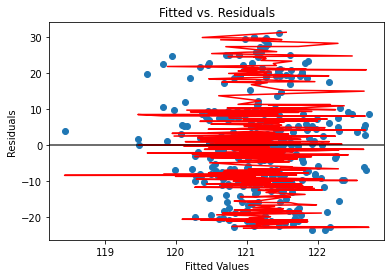

In [93]:
# Plot the fitted v residuals graph
plt.scatter(y_pred, residuals)
plt.plot(y_pred, lowess_values, c='r')
plt.axhline(y=0, c='black', alpha=.75)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Fitted vs. Residuals')
plt.show()

- The linear relation is assumed to be satisfied if there are no apparent trends in the plot. 
- The above plot satisfies this assumption. This plot also shows that the mean of the residuals is around 0. 
- The constant variance assumption is assumed to be satisfied if the vertical spread of the residuals remains roughly consistent across all fitted values, and as we can see this is the case. 
- The linear relation is assumed to be satisfied if there are no apparent trends in the plot.

#### 2. Normality Test

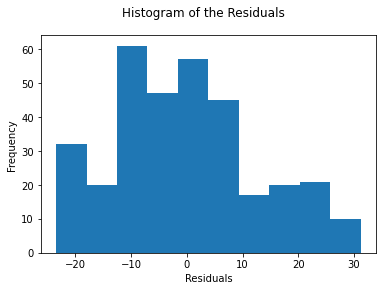

In [92]:
fig = plt.figure()
plt.hist(residuals)
fig.suptitle('Histogram of the Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

- Here we can see that the residuals are normally distributed.

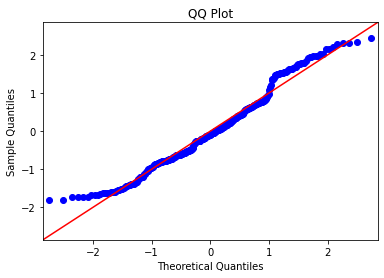

In [94]:
sm.qqplot(residuals, line='45', fit=True) 
plt.title('QQ Plot')
plt.show()

 - In a Q-Q plot if the two distributions which we are comparing are exactly equal then the points on the Q-Q plot will perfectly lie on a straight line y = x; which is the case above. Therefore we can assume that these the error is normally distributed. 

#### 4. The Error Terms are Independent

In [115]:
l = list(range(1,331))

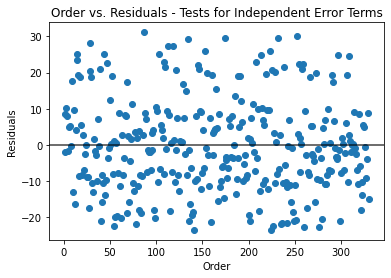

In [117]:
plt.scatter(l, residuals)
plt.axhline(y=0, c='black', alpha=.75)
plt.xlabel('Order')
plt.ylabel('Residuals')
plt.title('Order vs. Residuals - Tests for Independent Error Terms')
plt.show()

- If there is a trend in the residual values over time, then this assumption is violated. In the plot above we can see that this assumption has not been violated. 